In [1]:
import numpy as np
import pandas as pd

import torch

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rc('font', size=22)

In [4]:
import sys

In [5]:
from copy import deepcopy

In [6]:
sys.path.append('../')
sys.path.append('../../')

In [7]:
!ls -l ../data/*.csv

-rw-rw-r-- 1 ivan ivan  181219738 Jun  9 09:42 ../data/mles_embeddings.csv
-rw-r--r-- 1 ivan ivan      11031 Jun  9 09:42 ../data/sample_submission.csv
-rw-r--r-- 1 ivan ivan     408868 Jun  9 09:42 ../data/specs.csv
-rw-r--r-- 1 ivan ivan  398327801 Jun  9 09:42 ../data/test.csv
-rw-rw-r-- 1 ivan ivan      30664 Jun  9 09:42 ../data/test_ids.csv
-rw-r--r-- 1 ivan ivan 3878373423 Jun  9 09:42 ../data/train.csv
-rw-r--r-- 1 ivan ivan    1124229 Jun  9 09:42 ../data/train_labels.csv


In [8]:
train_target = pd.read_csv('../data/train_labels.csv')

In [10]:
train_target.head(5)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [12]:
df_vectors = pd.read_pickle('../data/mles_embeddings.pickle').set_index('game_session')
embedding_columns = df_vectors.columns.tolist()
df_vectors = pd.merge(df_vectors, train_target.set_index('game_session'), left_index=True, right_index=True)
df_vectors.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v060,v061,v062,v063,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
game_session,,,,,,,,,,,,,,,,,,,,,
901acc108f55a5a1,-0.108730,0.057131,0.011534,0.144631,0.185354,-0.069173,0.030405,0.034641,0.054882,-0.074081,...,0.166674,0.127759,0.087759,0.177336,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
77b8ee947eb84b4e,-0.122757,0.000135,0.108186,0.122341,0.138796,-0.056764,-0.018417,0.027297,0.023452,-0.035850,...,0.138501,0.116345,0.039770,0.198205,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
6bdf9623adc94d89,-0.114291,-0.110902,0.089908,0.124261,0.174895,-0.050953,-0.019261,0.024796,0.051993,-0.024825,...,0.182218,0.103919,0.022762,0.197502,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
9501794defd84e4d,-0.110181,-0.043104,0.112428,0.107845,0.187319,-0.062056,-0.038474,-0.040363,0.101250,-0.092993,...,0.148384,0.098876,0.063834,0.190919,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
a9ef3ecb3d1acc6a,-0.136620,-0.022368,0.084131,0.118890,0.152394,-0.064730,-0.056406,-0.050016,0.100197,-0.083974,...,0.139442,0.097059,0.067921,0.189101,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
df_pca = df_vectors.copy()

In [15]:
pca = PCA(n_components=2)
pca.fit(df_pca[embedding_columns].values)
np.sum(pca.explained_variance_ratio_)

0.13945316

In [16]:
pca_results = pca.transform(df_pca[embedding_columns].values)
df_pca['_pca_x'] = pca_results[:, 0]
df_pca['_pca_y'] = pca_results[:, 1]

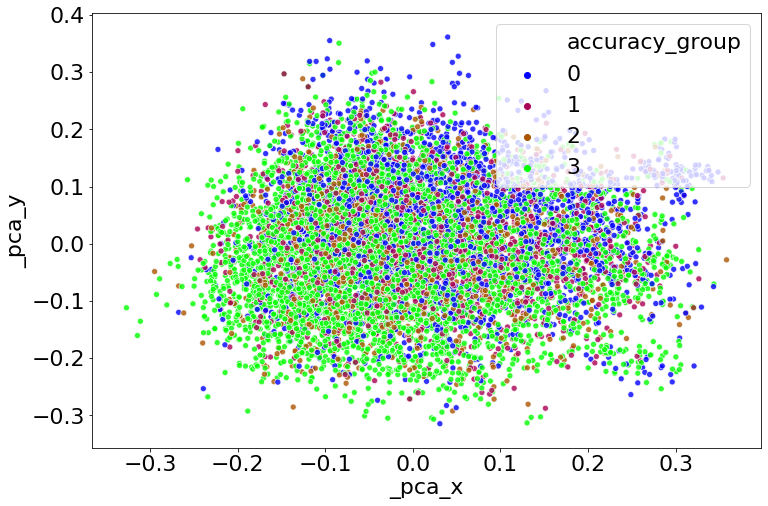

In [17]:
col_target = 'accuracy_group'
_, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(
    x='_pca_x', y='_pca_y',
    hue=col_target,
    # style='bins',
    data=df_pca.sample(n=10000),
    palette='brg',
    alpha=0.8,
    ax=axs,
    markers=['o', 'd', '*' , '.']
)
plt.show()

In [18]:
if len(df_pca) > 40000:
    df_tsne = df_pca.sample(n=40000).copy()
else:
    df_tsne = df_pca.copy()

In [19]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300, metric='cosine')
tsne_results = tsne.fit_transform(df_tsne[embedding_columns].values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17690 samples in 0.001s...
[t-SNE] Computed neighbors for 17690 samples in 4.035s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17690
[t-SNE] Computed conditional probabilities for sample 2000 / 17690
[t-SNE] Computed conditional probabilities for sample 3000 / 17690
[t-SNE] Computed conditional probabilities for sample 4000 / 17690
[t-SNE] Computed conditional probabilities for sample 5000 / 17690
[t-SNE] Computed conditional probabilities for sample 6000 / 17690
[t-SNE] Computed conditional probabilities for sample 7000 / 17690
[t-SNE] Computed conditional probabilities for sample 8000 / 17690
[t-SNE] Computed conditional probabilities for sample 9000 / 17690
[t-SNE] Computed conditional probabilities for sample 10000 / 17690
[t-SNE] Computed conditional probabilities for sample 11000 / 17690
[t-SNE] Computed conditional probabilities for sample 12000 / 17690
[t-SNE] Computed conditional probabilities for sam

In [ ]:
df_tsne['tSNE[0]'] = tsne_results[:, 0]
df_tsne['tSNE[1]'] = tsne_results[:, 1]

In [ ]:
for col_target, col_name, palette in zip(
    ['accuracy_group'],
    ['Accuracy group'],
    ['brg'] #, 'brg', 'hsv']  #'gnuplot2'
):
    _, axs = plt.subplots(1, 1, figsize=(12, 12))
    sns.scatterplot(
        x='tSNE[0]', y='tSNE[1]',
        hue=col_name,
        data=df_tsne[lambda x: ~x[col_target].isna()].rename(columns={col_target: col_name}),
        palette=palette,
        alpha=0.4, s=70,
        ax=axs,
    )
    # plt.show()

    plt.savefig(f'bowl-tsne-{col_target}.pdf')

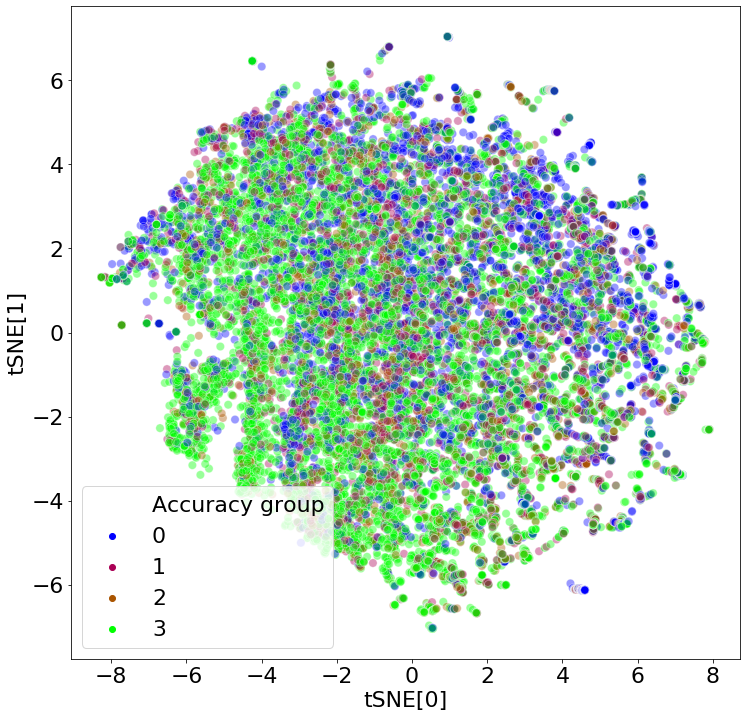

In [28]:
for col_target, col_name, palette in zip(
    ['accuracy_group'],
    ['Accuracy group'],
    ['brg'] #, 'brg', 'hsv']  #'gnuplot2'
):
    _, axs = plt.subplots(1, 1, figsize=(12, 12))
    sns.scatterplot(
        x='tSNE[0]', y='tSNE[1]',
        hue=col_name,
        data=df_tsne[lambda x: ~x[col_target].isna()].rename(columns={col_target: col_name}),
        palette=palette,
        alpha=0.4, s=70,
        ax=axs,
    )
    # plt.show()

    plt.savefig(f'bowl-tsne-{col_target}.pdf')